In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [54]:
train = pd.read_csv('D:/Dacon/house_value_predict/train.csv')
test = pd.read_csv('D:/Dacon/house_value_predict/test.csv')

특징의 의미들

id : 데이터 고유 id  
OverallQual : 전반적 재료와 마감 품질  
YearBuilt : 완공 연도  
YearRemodAdd : 리모델링 연도   
ExterQual : 외관 재료 품질  
BsmtQual : 지하실 높이  
TotalBsmtSF : 지하실 면적   
1stFlrSF : 1층 면적   
GrLivArea : 지상층 생활 면적  
FullBath : 지상층 화장실 개수   
KitchenQual : 부억 품질   
GarageYrBlt : 차고 완공 연도   
GarageCars: 차고 자리 개수  
GarageArea: 차고 면적   
target : 집값(달러 단위)  


### 결측치와 데이터 타입 확인

In [55]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (tota

(None, None)

확인결과, 결측치는 존재하지 않으며 3개의 범주형 데이터가 있음.

In [56]:
train.head(20)

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
5,6,8,1968,Gd,3,680,Ex,774,774,Ex,2,2009,2010,2009,269500
6,7,6,1478,TA,2,442,TA,1478,1478,TA,1,1957,1957,1957,156500
7,8,8,2524,Gd,2,542,Gd,2524,2524,Gd,2,1981,1981,1981,278000
8,9,8,2649,Gd,3,746,Gd,1479,1515,Ex,2,2001,2002,2001,421250
9,10,8,1440,Gd,2,467,Gd,1432,1440,Ex,2,2003,2003,2003,232500


### head(20)을 보고 궁금했던 점, Quality의 종류는 과연 4가지가 맞는지? 그리고, Qual마다 종류가 모두 같은지?

In [57]:
train['Exter Qual'].value_counts()

TA    808
Gd    485
Ex     49
Fa      8
Name: Exter Qual, dtype: int64

In [58]:
train['Kitchen Qual'].value_counts()

TA    660
Gd    560
Ex    107
Fa     23
Name: Kitchen Qual, dtype: int64

In [59]:
train['Bsmt Qual'].value_counts()

TA    605
Gd    582
Ex    134
Fa     28
Po      1
Name: Bsmt Qual, dtype: int64

출력 결과 총 5가지의 품질 종류가 있음. 일단, 범주형데이터에 대해 숫자변환  
개수가 많은 TA부터 Po까지 0~4로 배정  
TA : 0  
Gd : 1  
Ex : 2  
Fa : 3  
Po : 4  

In [60]:
qualList = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']
for qual in qualList:
    train.loc[train[qual] == 'TA', qual] = 0
    train.loc[train[qual] == 'Gd', qual] = 1
    train.loc[train[qual] == 'Ex', qual] = 2
    train.loc[train[qual] == 'Fa', qual] = 3
    train.loc[train[qual] == 'Po', qual] = 4
    
train = train.astype('int64') # 숫자를 넣었지만 여전히 타입은 object 이므로
train.head(20)

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,2,3,968,2,2392,2392,2,2,2003,2003,2003,386250
1,2,7,1352,1,2,466,1,1352,1352,2,2,2006,2007,2006,194000
2,3,5,900,0,1,288,0,864,900,0,1,1967,1967,1967,123000
3,4,5,1174,0,2,576,1,680,680,0,1,1900,2006,2000,135000
4,5,7,1958,1,3,936,1,1026,1026,1,2,2005,2005,2005,250000
5,6,8,1968,1,3,680,2,774,774,2,2,2009,2010,2009,269500
6,7,6,1478,0,2,442,0,1478,1478,0,1,1957,1957,1957,156500
7,8,8,2524,1,2,542,1,2524,2524,1,2,1981,1981,1981,278000
8,9,8,2649,1,3,746,1,1479,1515,2,2,2001,2002,2001,421250
9,10,8,1440,1,2,467,1,1432,1440,2,2,2003,2003,2003,232500


In [61]:
qualList = ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']
for qual in qualList:
    test.loc[test[qual] == 'TA', qual] = 0
    test.loc[test[qual] == 'Gd', qual] = 1
    test.loc[test[qual] == 'Ex', qual] = 2
    test.loc[test[qual] == 'Fa', qual] = 3
    test.loc[test[qual] == 'Po', qual] = 4
    
test = test.astype('int64') # 숫자를 넣었지만 여전히 타입은 object 이므로
test.head(20)

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,1,2,702,2,1800,1800,2,2,2007,2007,2007
1,2,6,1082,0,1,240,0,1082,1082,0,1,1948,1950,1948
2,3,6,1573,1,2,440,1,756,769,1,2,2000,2000,2000
3,4,6,2443,1,3,744,1,1158,1158,1,2,2004,2004,2004
4,5,5,1040,0,2,686,0,1040,1040,0,1,1968,1968,1991
5,6,5,1902,0,2,576,0,1100,1226,0,2,1923,1950,1960
6,7,6,1302,1,2,631,1,1302,1302,1,1,2005,2006,2005
7,8,4,1040,0,2,648,0,1064,1040,0,1,1963,1963,1963
8,9,5,1144,0,1,336,0,1144,1144,0,1,1963,1963,1962
9,10,8,1978,1,3,850,1,1978,1978,1,2,2003,2003,2003


정상적으로 변환이 완료된 모습

### 상관계수 출력, 각 특징의 중요도 파악

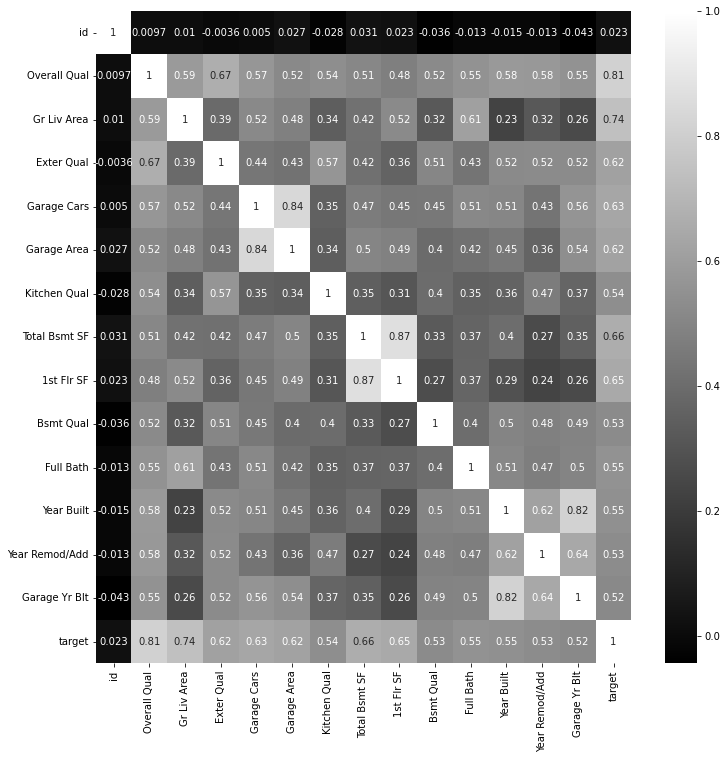

In [62]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), annot = True, cmap='gray')
plt.show()

출력 결과 target에 대하여  
1. Overall Qual (전반적 재료와 마감 품질) : 0.81
2. Gr Liv Area (지상층 생활 면적) : 0.74
3. Total Bsmt SF (지하실 면적) : 0.66  
순으로 중요도를 가짐

비교적 중요도가 낮은 특징들을 보면
1. Garage Yr Blt(차고 완공 연도) : 0.52
2. Year Remod/Add(리모델링 연도) : 0.53
3. Bsmt Qual(지하실 높이) : 0.53
4. Kitchen Qual(부엌 품질) : 0.54
5. Full Bath(총 침대개수) : 0.55  
등등이 있는데 의미없는 특징들은 없는 것으로 파악됨.

### 이상치를 조회해봅니다

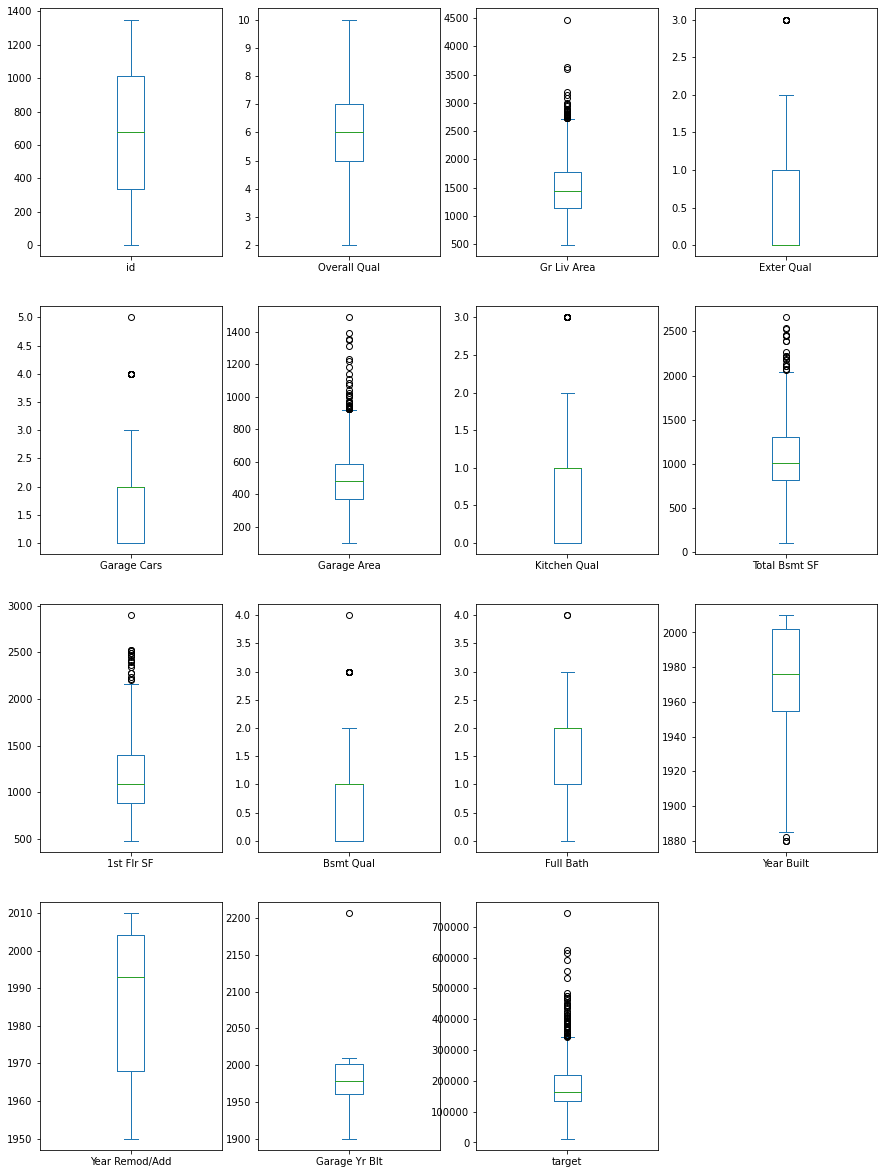

In [63]:
train.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 21))
plt.show()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

이상치가 있는 컬럼과 없는 컬럼이 있습니다. 저는 이 이상치들을 Nan으로 바꿔주고,  
다른 특징들의 값을 토대로 해당 컬럼을 예측하여 대입하도록 하겠습니다.

In [64]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    # 넘파이의 값을 퍼센트로 표시해주는 함수

    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))


In [65]:
outlier_features = ['Gr Liv Area',
                   'Garage Area',
                   'Total Bsmt SF',
                   '1st Fir SF',
                   'Year Built']

GrLivArea_index_train = outliers_iqr(train['Gr Liv Area'])[0]
GarageArea_index_train = outliers_iqr(train['Garage Area'])[0]
TotalBsmtSF_index_train = outliers_iqr(train['Total Bsmt SF'])[0]
FlrSF_index_train = outliers_iqr(train['1st Flr SF'])[0]
YearBuilt_index_train = outliers_iqr(train['Year Built'])[0]

각 특징별로 이상치가 존재하는 행의 인덱스를 가져왔습니다.

In [66]:
print(f'GrLivArea_index의 이상치 개수: {len(GrLivArea_index_train)}')
print(f'GarageArea_index 이상치 개수: {len(GarageArea_index_train)}')
print(f'TotalBsmtSF_index 이상치 개수: {len(TotalBsmtSF_index_train)}')
print(f'FlrSF_index 이상치 개수: {len(FlrSF_index_train)}')
print(f'YearBuilt_index 이상치 개수: {len(YearBuilt_index_train)}')

GrLivArea_index의 이상치 개수: 29
GarageArea_index 이상치 개수: 36
TotalBsmtSF_index 이상치 개수: 19
FlrSF_index 이상치 개수: 18
YearBuilt_index 이상치 개수: 4


테스트셋의 이상치도 동일하게 가져옵니다.

In [67]:
GrLivArea_index_test = outliers_iqr(test['Gr Liv Area'])[0]
GarageArea_index_test = outliers_iqr(test['Garage Area'])[0]
TotalBsmtSF_index_test = outliers_iqr(test['Total Bsmt SF'])[0]
FlrSF_index_test = outliers_iqr(test['1st Flr SF'])[0]
YearBuilt_index_test = outliers_iqr(test['Year Built'])[0]

In [68]:
print(f'GrLivArea_index의 이상치 개수: {len(GrLivArea_index_test)}')
print(f'GarageArea_index 이상치 개수: {len(GarageArea_index_test)}')
print(f'TotalBsmtSF_index 이상치 개수: {len(TotalBsmtSF_index_test)}')
print(f'FlrSF_index 이상치 개수: {len(FlrSF_index_test)}')
print(f'YearBuilt_index 이상치 개수: {len(YearBuilt_index_test)}')

GrLivArea_index의 이상치 개수: 43
GarageArea_index 이상치 개수: 36
TotalBsmtSF_index 이상치 개수: 22
FlrSF_index 이상치 개수: 21
YearBuilt_index 이상치 개수: 2


특징 대체 순서는, 이상치가 많은 특징부터 진행합니다. 역순으로 되면 이상치가 많이 포함된 상태로 예측이 진행되기 때문입니다.

## Garage Area 보간 (Random Forest 적용)

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [70]:
def predict_outlier(feature):
    temp = train.drop('target', axis=1)
    temp_na = temp.loc[temp[feature].notna()]
    temp_X = temp_na.drop(feature, axis = 1)
    temp_y = temp_na[feature]
    
    model =  RandomForestRegressor(n_estimators=1000).fit(temp_X, temp_y)
    Nan_X = temp.loc[train[feature].isna()].drop(feature, axis = 1)
    
    train.loc[train[feature].isna(), feature] = model.predict(Nan_X)
    return model


In [71]:
train.iloc[GarageArea_index_train, 5] = np.NaN
Garage_Area_model = predict_outlier('Garage Area')

train.iloc[GrLivArea_index_train, 2] = np.NaN
Gr_Liv_Area_model = predict_outlier('Gr Liv Area')

train.iloc[TotalBsmtSF_index_train, 7] = np.NaN
Total_Bsmt_SF_model = predict_outlier('Total Bsmt SF')

train.iloc[FlrSF_index_train, 8] = np.NaN
Flr_SF_model = predict_outlier('1st Flr SF')

train.iloc[YearBuilt_index_train, -4] = np.NaN
Year_Built_model = predict_outlier('Year Built')

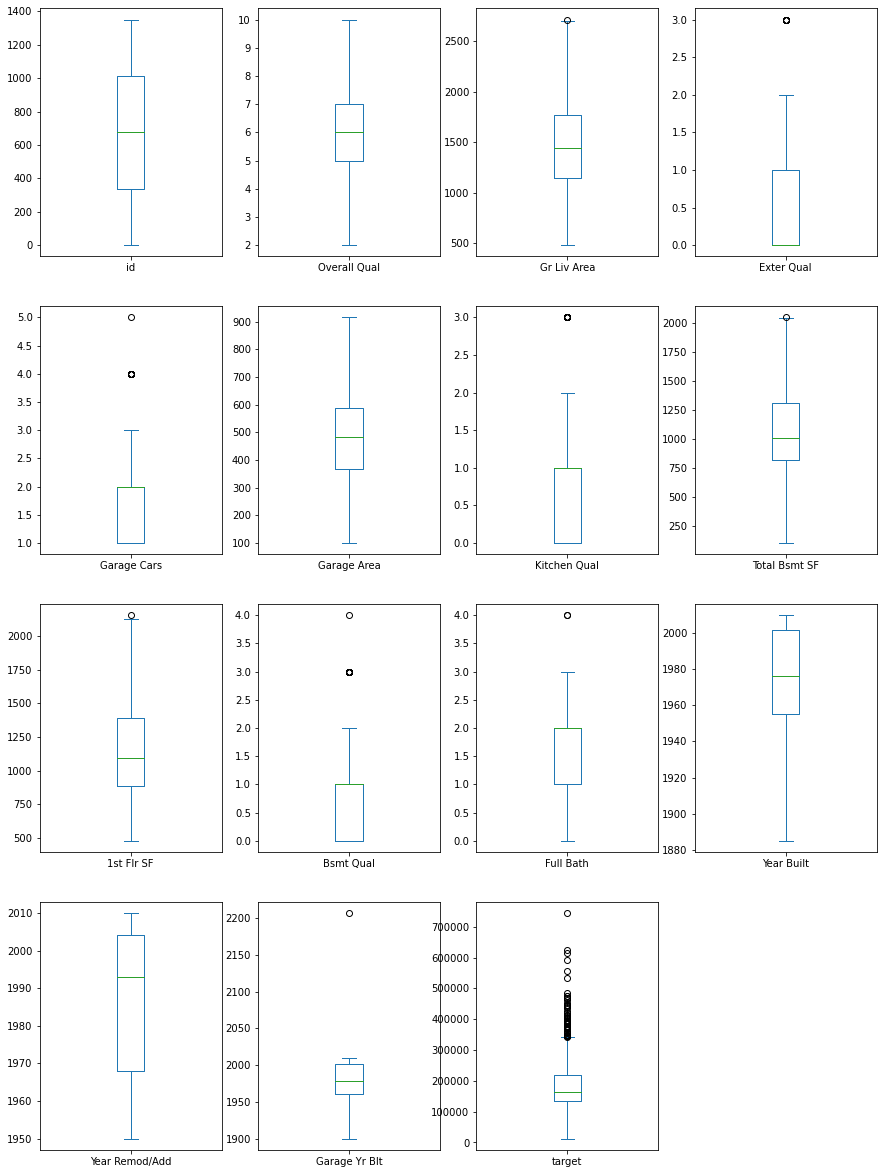

In [72]:
train.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 21))
plt.show()   

기존 이상치가 모두 제거된 모습을 볼 수 있습니다.  
Test셋에도 적용해줍니다. (train에서 사용한 predict_outlier을 그대로 사용하면 `부정행위` 입니다.)



In [73]:
test.iloc[GarageArea_index_test, 5] = np.NaN
Nan_X = test.loc[test['Garage Area'].isna()].drop('Garage Area', axis = 1)
test.loc[test['Garage Area'].isna(), 'Garage Area'] = Garage_Area_model.predict(Nan_X)

test.iloc[GrLivArea_index_test, 2] = np.NaN
Nan_X = test.loc[test['Gr Liv Area'].isna()].drop('Gr Liv Area', axis = 1)
test.loc[test['Gr Liv Area'].isna(), 'Gr Liv Area'] = Gr_Liv_Area_model.predict(Nan_X)

test.iloc[TotalBsmtSF_index_test, 7] = np.NaN
Nan_X = test.loc[test['Total Bsmt SF'].isna()].drop('Total Bsmt SF', axis = 1)
test.loc[test['Total Bsmt SF'].isna(), 'Total Bsmt SF'] = Total_Bsmt_SF_model.predict(Nan_X)

test.iloc[FlrSF_index_test, 8] = np.NaN
Nan_X = test.loc[test['1st Flr SF'].isna()].drop('1st Flr SF', axis = 1)
test.loc[test['1st Flr SF'].isna(), '1st Flr SF'] = Flr_SF_model.predict(Nan_X)

test.iloc[YearBuilt_index_test, -3] = np.NaN
Nan_X = test.loc[test['Year Built'].isna()].drop('Year Built', axis = 1)
test.loc[test['Year Built'].isna(), 'Year Built'] = Year_Built_model.predict(Nan_X)

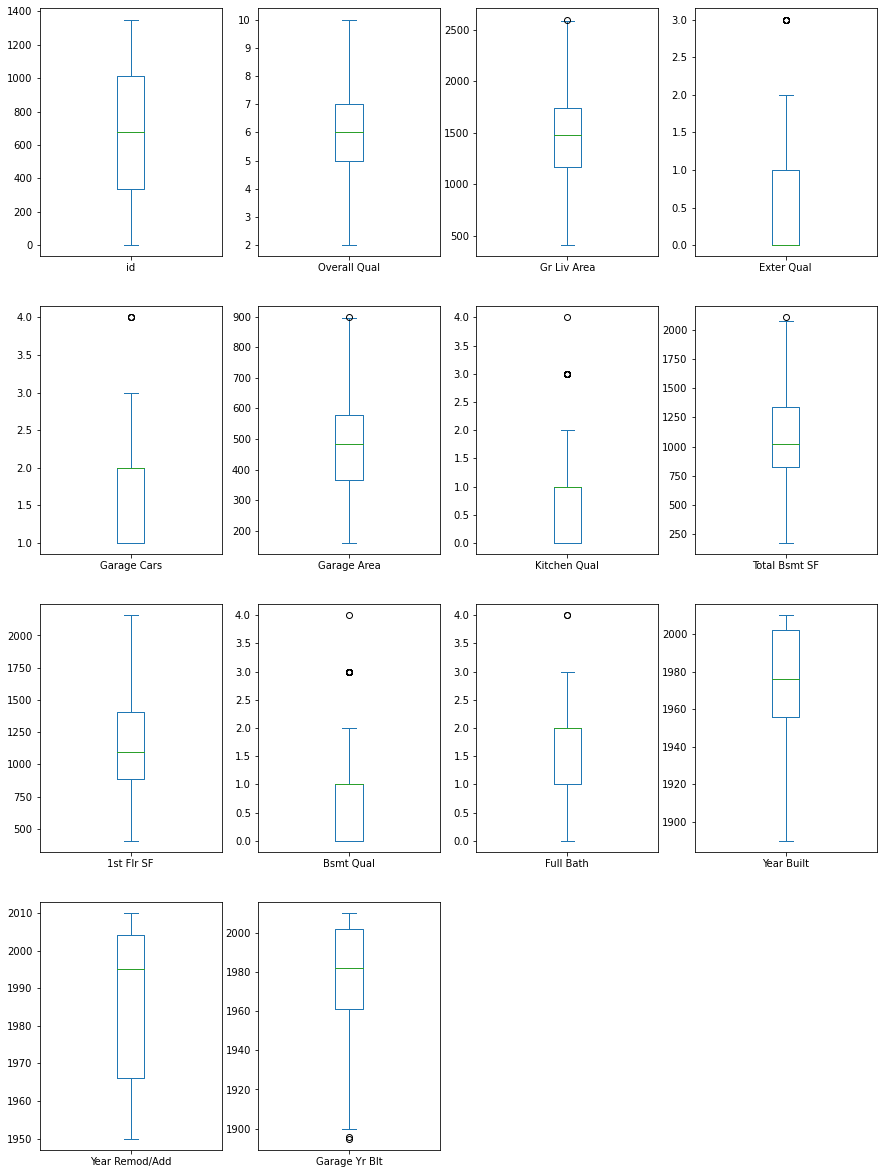

In [74]:
test.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 21))
plt.show()  

In [75]:
train.astype('float32')

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1.0,10.0,2392.000000,2.0,3.0,793.807983,2.0,1875.579956,1911.370972,2.0,2.0,2003.0,2003.0,2003.0,386250.0
1,2.0,7.0,1352.000000,1.0,2.0,466.000000,1.0,1352.000000,1352.000000,2.0,2.0,2006.0,2007.0,2006.0,194000.0
2,3.0,5.0,900.000000,0.0,1.0,288.000000,0.0,864.000000,900.000000,0.0,1.0,1967.0,1967.0,1967.0,123000.0
3,4.0,5.0,1174.000000,0.0,2.0,576.000000,1.0,680.000000,680.000000,0.0,1.0,1900.0,2006.0,2000.0,135000.0
4,5.0,7.0,1958.000000,1.0,3.0,765.598999,1.0,1026.000000,1026.000000,1.0,2.0,2005.0,2005.0,2005.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346.0,6.0,1756.000000,1.0,2.0,422.000000,0.0,872.000000,888.000000,2.0,2.0,1996.0,1997.0,1996.0,204000.0
1346,1347.0,9.0,2213.525879,1.0,3.0,850.000000,2.0,1850.000000,1850.000000,2.0,2.0,2006.0,2006.0,2006.0,390000.0
1347,1348.0,5.0,1214.000000,0.0,1.0,318.000000,0.0,1214.000000,1214.000000,0.0,2.0,1967.0,1967.0,1967.0,143000.0
1348,1349.0,5.0,894.000000,0.0,2.0,440.000000,0.0,864.000000,894.000000,1.0,1.0,1974.0,1974.0,1974.0,131000.0


In [76]:
data = train.drop('target', axis=1)
target = train['target']

성능 확인을 위해, Kfold를 진행합니다.

In [77]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [78]:
from sklearn.model_selection import StratifiedKFold

def kfold(model):
    cv_accuracy = []
    cv = StratifiedKFold(n_splits=10)
    
    n_iter = 0
    
    for t, v in cv.split(train, train['target']):
        
        train_cv = train.iloc[t] # 훈련용
        val_cv = train.iloc[v] # 검증용 분리

        train_X = train_cv.drop('target', axis=1)
        train_y = train_cv['target']

        val_X = val_cv.drop('target', axis=1)
        val_y = val_cv['target']
        
        model.fit(train_X, train_y)
        NMAE_score = NMAE(val_y, model.predict(val_X))
        # print(f'k = {n_iter}, NMAE: {NMAE_score}')
        
        cv_accuracy.append(NMAE_score)
        n_iter += 1
    # print(f'평균 NMAE: {np.mean(cv_accuracy)}')
    return np.mean(cv_accuracy)

In [79]:
scores = []
scores.append(f'CBR : {kfold(CatBoostRegressor(silent=True))}')
scores.append(f'KNR : {kfold(KNeighborsRegressor())}')
scores.append(f'LR : {kfold(LinearRegression())}')
scores.append(f'RID : {kfold(Ridge())}')
scores.append(f'LAS : {kfold(Lasso())}')
scores.append(f'DTR : {kfold(DecisionTreeRegressor())}')
scores.append(f'RFR : {kfold(RandomForestRegressor())}')
scores.append(f'GBR : {kfold(GradientBoostingRegressor())}')
scores.append(f'XGBR : {kfold(XGBRegressor())}')
scores.append(f'LGBM : {kfold(LGBMRegressor())}')
scores.append(f'ElNet : {kfold(ElasticNet())}')
scores.append(f'SVM : {kfold(SVR())}')
scores.append(f'ADA : {kfold(AdaBoostRegressor())}')
scores.append(f'ETR : {kfold(ExtraTreesRegressor())}')

In [80]:
for i in scores:
    print(i)

CBR : 0.0976986175813342
KNR : 0.14973644018797133
LR : 0.12358210925467183
RID : 0.12356133565663034
LAS : 0.12358031880626534
DTR : 0.14108097467049577
RFR : 0.10250709007019738
GBR : 0.1008667109682136
XGBR : 0.10998579396534267
LGBM : 0.10344887442505941
ElNet : 0.12237536109433071
SVM : 0.29812465652016734
ADA : 0.12324073880580784
ETR : 0.09906169284300113


In [81]:
CBR_model = CatBoostRegressor(silent=True).fit(data, target)
RFR_model = RandomForestRegressor(n_estimators = 1000).fit(data, target)
GBR_model = GradientBoostingRegressor(n_estimators=1000).fit(data, target)
ETR_model = ExtraTreesRegressor(n_estimators=1000).fit(data, target)

CBR_pred = CBR_model.predict(test)
RFR_pred = RFR_model.predict(test)
GBR_pred = GBR_model.predict(test)
ETR_pred = ETR_model.predict(test)

In [82]:
pred = (CBR_pred  + RFR_pred ) / 2

In [83]:
submission = pd.read_csv('D:/Dacon/house_value_predict/sample_submission.csv')
submission


,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
1345,1346,0
1346,1347,0
1347,1348,0
1348,1349,0


In [84]:
submission['target'] = pred
submission

,id,target
0,1,340585.149105
1,2,131257.084486
2,3,176485.641549
3,4,249607.345926
4,5,135136.522335
...,...,...
1345,1346,333685.161702
1346,1347,126365.877714
1347,1348,84618.996520
1348,1349,206443.513802


In [85]:
submission.to_csv('D:/Dacon/house_value_predict/submission_CB_RFR.csv', index=False)